<a href="https://colab.research.google.com/github/cly1213/Colab/blob/master/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
os.chdir("/content/gdrive/My Drive") #change directory

In [6]:
os.getcwd()

'/content/gdrive/My Drive'

In [7]:
!ls

'Colab Notebooks'   data   dogscats   dogscats.zip   input   source


In [8]:
import pandas as pd
dataset = pd.read_csv('./input/titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
dataset.shape

(891, 12)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [0]:
def bar_chart(feature):
  survived = dataset[dataset['Survived']==1][feature].value_counts() 
  dead = dataset[dataset['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

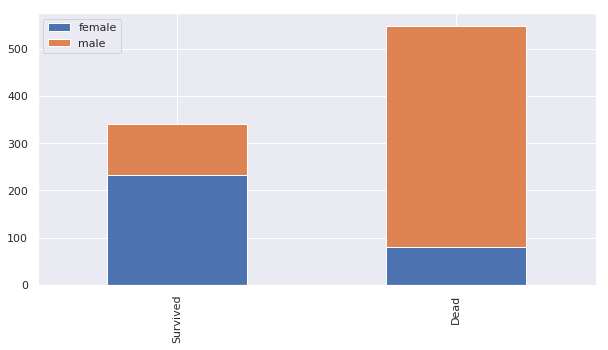

In [13]:
bar_chart('Sex')

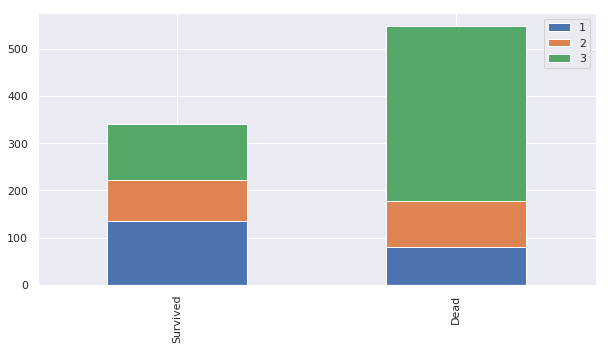

In [14]:
bar_chart('Pclass')

In [0]:
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#https://reurl.cc/qeZQE
#https://reurl.cc/Neb8n

In [16]:
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Mme           1
Jonkheer      1
Capt          1
Lady          1
Sir           1
Don           1
Countess      1
Name: Title, dtype: int64

In [0]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2}

dataset['Title'] = dataset['Title'].map(title_mapping)


In [0]:
#add 
dataset['Title'] = dataset['Title'].fillna(3)

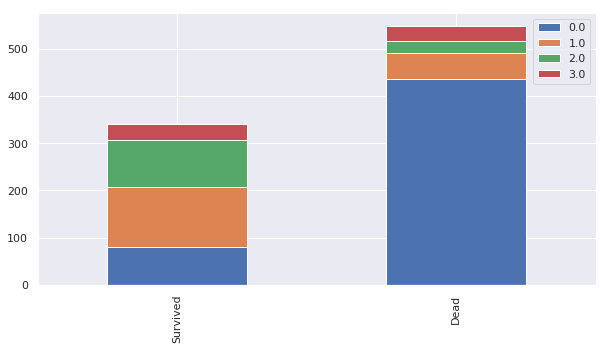

In [19]:
bar_chart('Title')

In [0]:
sex_mapping = {"male":0, "female":1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

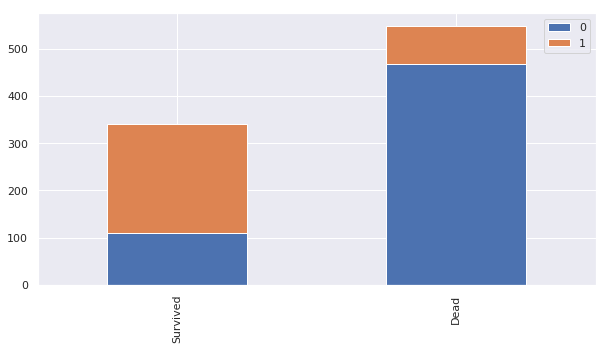

In [21]:
bar_chart('Sex')

In [22]:
dataset.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.00,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.00,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.00,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.00,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.00,1,0,237736,30.0708,NaN,C,2.0


In [23]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others) 
dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"), inplace=True) 
dataset["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      30.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     30.0
18     31.0
19     35.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     30.0
27     19.0
28     21.0
29     30.0
       ... 
861    21.0
862    48.0
863    21.0
864    24.0
865    42.0
866    27.0
867    31.0
868    30.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    30.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

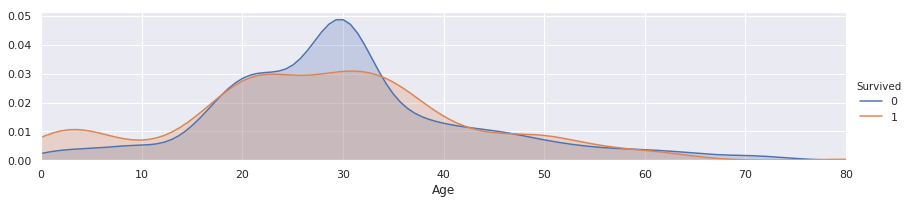

In [24]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4) 
facet.map(sns.kdeplot,'Age',shade= True) 
facet.set(xlim=(0, dataset['Age'].max())) 
facet.add_legend()

plt.show()

In [0]:
dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0, 
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1, 
dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2, 
dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3, 
dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [26]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0


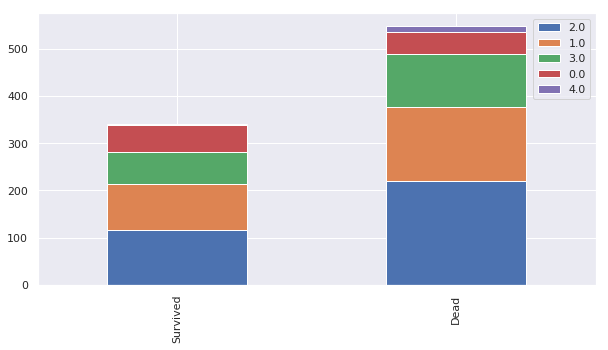

In [27]:
bar_chart('Age')

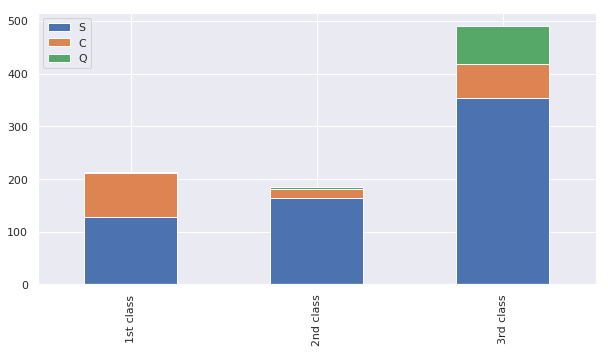

In [28]:
Pclass1 = dataset[dataset['Pclass']==1]['Embarked'].value_counts() 
Pclass2 = dataset[dataset['Pclass']==2]['Embarked'].value_counts() 
Pclass3 = dataset[dataset['Pclass']==3]['Embarked'].value_counts() 
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class'] 
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [29]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')
dataset.head(100)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,30.0708,NaN,C,2.0


In [0]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)


In [31]:
dataset.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0.0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,8.4583,NaN,2,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,0,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,0,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,11.1333,NaN,0,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,30.0708,NaN,1,2.0


In [32]:
#fill missing Fare with median fare for each Pclass
dataset["Fare"].fillna(dataset.groupby("Pclass")["Fare"].transform("median"), inplace=True) 
dataset["Fare"]

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: Fare, Length: 891,

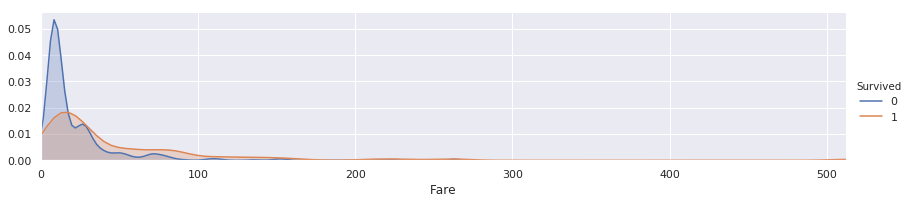

In [33]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True) 
facet.set(xlim=(0, dataset['Fare'].max())) 
facet.add_legend()
plt.show()

In [0]:
dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0, 
dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1, 
dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,  
dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [35]:
dataset.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,C85,1,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,C123,0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0,0.0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,0.0,NaN,2,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,2.0,E46,0,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,1.0,NaN,0,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,0.0,NaN,0,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,2.0,NaN,1,2.0


In [36]:
dataset.Cabin.value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
E101               3
F2                 3
C22 C26            3
F33                3
D                  3
C93                2
D20                2
D26                2
E67                2
D33                2
F4                 2
B49                2
C65                2
B57 B59 B63 B66    2
B77                2
E8                 2
B22                2
C124               2
F G73              2
D36                2
D35                2
C83                2
B20                2
C126               2
C78                2
C123               2
E121               2
                  ..
E58                1
C128               1
D10 D12            1
C54                1
B37                1
C45                1
A32                1
C106               1
B78                1
B86                1
B41                1
C50                1
C32                1
A20                1
C118               1
A7                 1
B42          

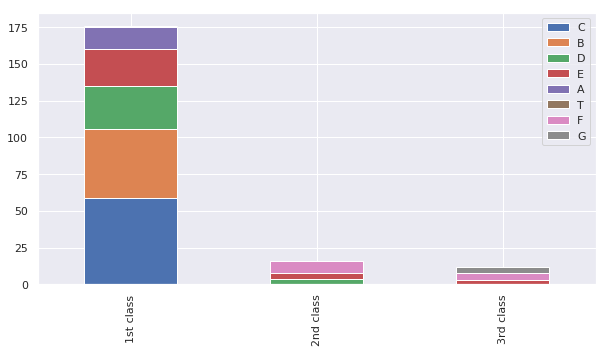

In [37]:
dataset['Cabin'] = dataset['Cabin'].str[:1]
Pclass1 = dataset[dataset['Pclass']==1]['Cabin'].value_counts() 
Pclass2 = dataset[dataset['Pclass']==2]['Cabin'].value_counts() 
Pclass3 = dataset[dataset['Pclass']==3]['Cabin'].value_counts() 
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class'] 
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [0]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8} 
dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [0]:
# fill missing Cabin with median cabin for each Pclass 
dataset["Cabin"].fillna(dataset.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [0]:
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

(0, 11.0)

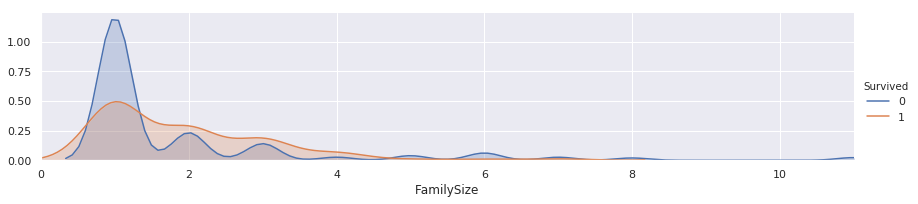

In [41]:
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4) 
facet.map(sns.kdeplot,'FamilySize',shade= True) 
facet.set(xlim=(0, dataset['FamilySize'].max())) 
facet.add_legend()
plt.xlim(0)

In [0]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4} 
dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)
 

In [0]:
features_drop = ['Ticket','SibSp','Parch', 'PassengerId','Name']
dataset = dataset.drop(features_drop, axis=1)

In [44]:
dataset_data = dataset.drop('Survived', axis=1)
dataset_target = dataset['Survived']

#dataset_data['Title'] = dataset_data['Title'].fillna('3')

dataset_data.shape, dataset_target.shape

((891, 8), (891,))

In [45]:
dataset_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,3.0,2.0,0.8,1,2.0,0.4
2,3,1,1.0,0.0,2.0,0,1.0,0.0
3,1,1,2.0,2.0,0.8,0,2.0,0.4
4,3,0,2.0,0.0,2.0,0,0.0,0.0
5,3,0,2.0,0.0,2.0,2,0.0,0.0
6,1,0,3.0,2.0,1.6,0,0.0,0.0
7,3,0,0.0,1.0,2.0,0,3.0,1.6
8,3,1,2.0,0.0,2.0,0,2.0,0.8
9,2,1,0.0,2.0,1.8,1,2.0,0.4


In [46]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import Adam
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1)) 

scaledFeatures = minmax_scale.fit_transform(dataset_data)

Using TensorFlow backend.


In [0]:
def build_model():
  #build model
  model = Sequential()
  
  model.add(Dense(input_dim=8,units=40,activation ='relu'))
  model.add(Dense(units=100,activation ='relu'))
  model.add(Dense(units=10,activation ='relu'))
  model.add(Dense(units=1,activation ='sigmoid'))
  model.summary()
  
  return model


In [0]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()
    

W0724 08:23:51.919651 140261200816000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 08:23:51.946552 140261200816000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 08:23:51.950592 140261200816000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 08:23:52.017942 140261200816000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0724 08:23:52.043806 140261200816000 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                360       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               4100      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 5,481
Trainable params: 5,481
Non-trainable params: 0
_________________________________________________________________


W0724 08:23:52.248330 140261200816000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 712 samples, validate on 179 samples
Epoch 1/20
712/712 [==============================] - 0s 539us/step - loss: 0.6643 - acc: 0.6938 - val_loss: 0.6071 - val_acc: 0.7989
Epoch 2/20
712/712 [==============================] - 0s 61us/step - loss: 0.5724 - acc: 0.7949 - val_loss: 0.4880 - val_acc: 0.8101
Epoch 3/20
712/712 [==============================] - 0s 60us/step - loss: 0.4827 - acc: 0.8020 - val_loss: 0.4070 - val_acc: 0.8212
Epoch 4/20
712/712 [==============================] - 0s 58us/step - loss: 0.4470 - acc: 0.8048 - val_loss: 0.3918 - val_acc: 0.8156
Epoch 5/20
712/712 [==============================] - 0s 63us/step - loss: 0.4395 - acc: 0.8132 - val_loss: 0.3844 - val_acc: 0.8268
Epoch 6/20
712/712 [==============================] - 0s 60us/step - loss: 0.4440 - acc: 0.7949 - val_loss: 0.3815 - val_acc: 0.8603
Epoch 7/20
712/712 [==============================] - 0s 69us/step - loss: 0.4339 - acc: 0.8216 - val_loss: 0.3769 - val_acc: 0.8380
Epoch 8/20
712/712 [==

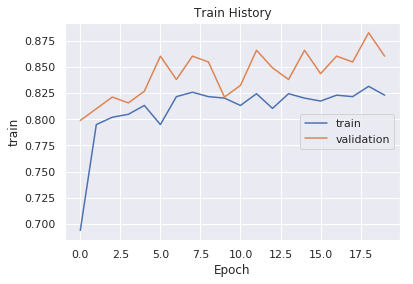

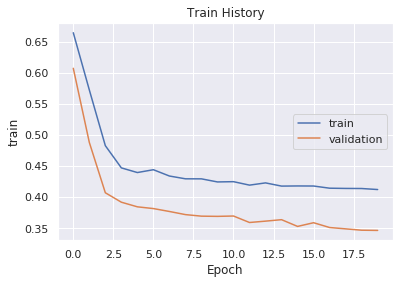

In [49]:
model = build_model()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
train_history = model.fit(scaledFeatures, dataset_target, validation_split=0.2, batch_size=30, epochs=20)

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')